# Credit Card Transactions Fraud Detection Predict

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import warnings
warnings.filterwarnings('ignore')

# Reading the Train and Test Datasets

In [3]:
train = pd.read_csv(r"C:\PGA32\Internship_Vitual\Codsoft\fraudTrain.csv")
test = pd.read_csv(r"C:\PGA32\Internship_Vitual\Codsoft\fraudTest.csv")

df = pd.concat([train, test], axis = 0)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.shape

(1852394, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

In [6]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
df.duplicated().sum()

0

### Numerical Columns

In [8]:
df.dtypes[df.dtypes!="object"]

Unnamed: 0      int64
cc_num          int64
amt           float64
zip             int64
lat           float64
long          float64
city_pop        int64
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

### Categorical Columns

In [9]:
df.dtypes[df.dtypes=="object"]

trans_date_trans_time    object
merchant                 object
category                 object
first                    object
last                     object
gender                   object
street                   object
city                     object
state                    object
job                      object
dob                      object
trans_num                object
dtype: object

### Missing Value Treatment 

In [10]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### Visualizing minimum value, maximum value, variance, standard deviation, 1st, 10th, 25th, 50th, 75th, 90th, 99th Histogram and Barplot graphs of percentiles, interquartile range (IQR)

In [11]:
def numerical(data,var,graph_plot=True):
    min_n=data[var].min()
    max_n=data[var].max()
    var_n=data[var].var()
    std_n=data[var].std()
    p1=data[var].quantile(.01)
    p10=data[var].quantile(.1)
    p25=data[var].quantile(.25)
    p50=data[var].quantile(.5)
    p75=data[var].quantile(.75)
    p90=data[var].quantile(.9)
    p99=data[var].quantile(.99)
    iqr=p75-p25
    
    if graph_plot==True:
        sns.histplot(data[var])
        plt.show()
        sns.boxplot(y=data[var])
        plt.show()
        
    results={"min":min_n,"max":max_n,"var":var_n,"std":std_n,
            "p1":p1,"p10":p10,"p25":p25,"p50":p50,"p75":p75,"p90":p90,"p99":p99}
    return results

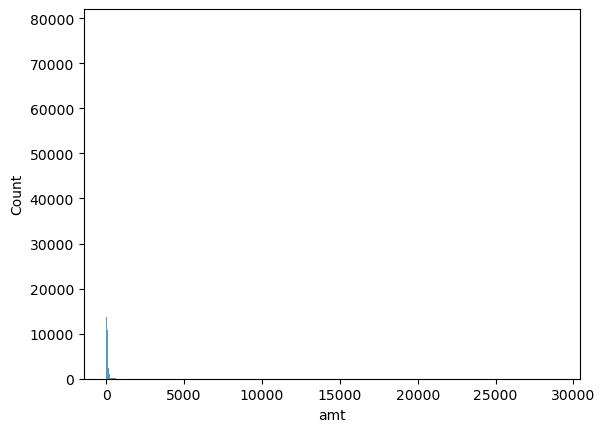

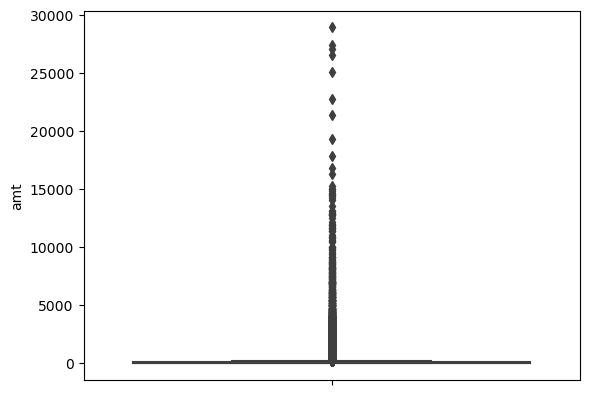

{'min': 1.0,
 'max': 28948.9,
 'var': 25361.828481306125,
 'std': 159.25397477396325,
 'p1': 1.26,
 'p10': 4.1,
 'p25': 9.64,
 'p50': 47.45,
 'p75': 83.1,
 'p90': 136.33,
 'p99': 537.9}

In [12]:
numerical(data=df, var="amt")

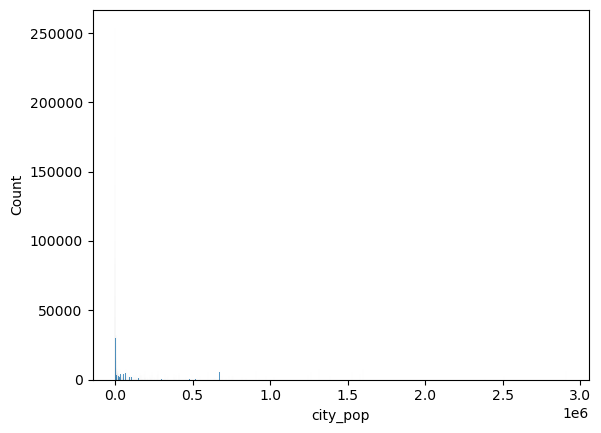

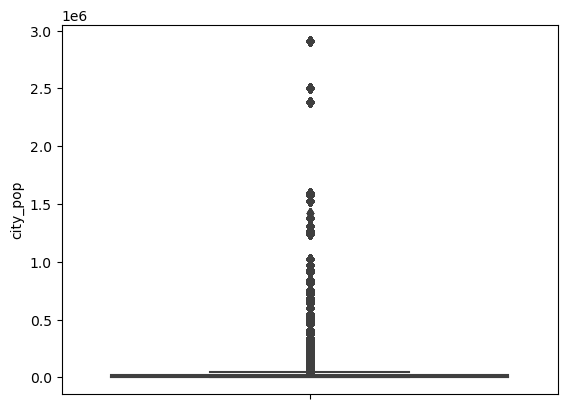

{'min': 23,
 'max': 2906700,
 'var': 90894784014.48291,
 'std': 301487.61834357795,
 'p1': 53.0,
 'p10': 260.0,
 'p25': 741.0,
 'p50': 2443.0,
 'p75': 20328.0,
 'p90': 186140.0,
 'p99': 1577385.0}

In [13]:
numerical(data=df, var="city_pop")

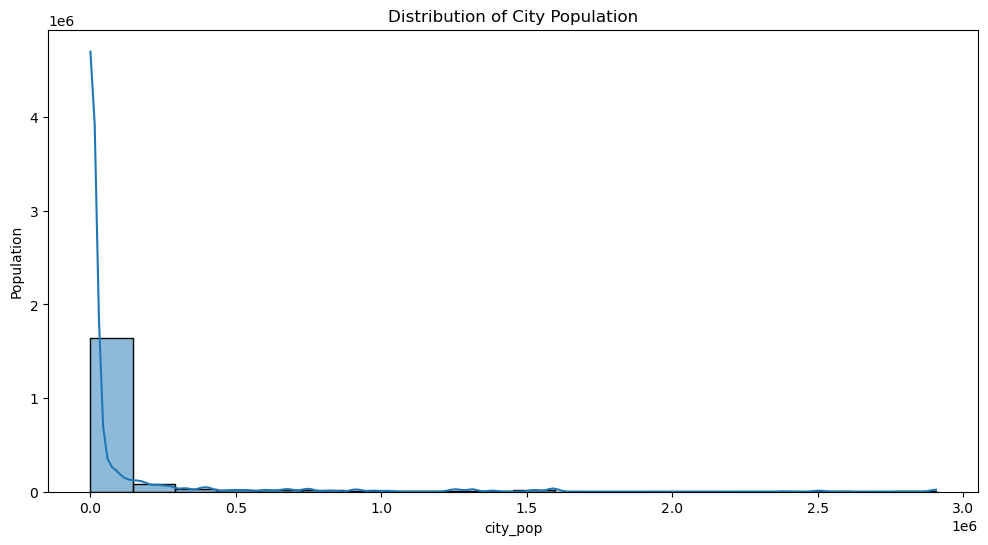

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df['city_pop'], bins=20, kde=True)
plt.xlabel('city_pop')
plt.ylabel('Population')
plt.title('Distribution of City Population')
plt.show()

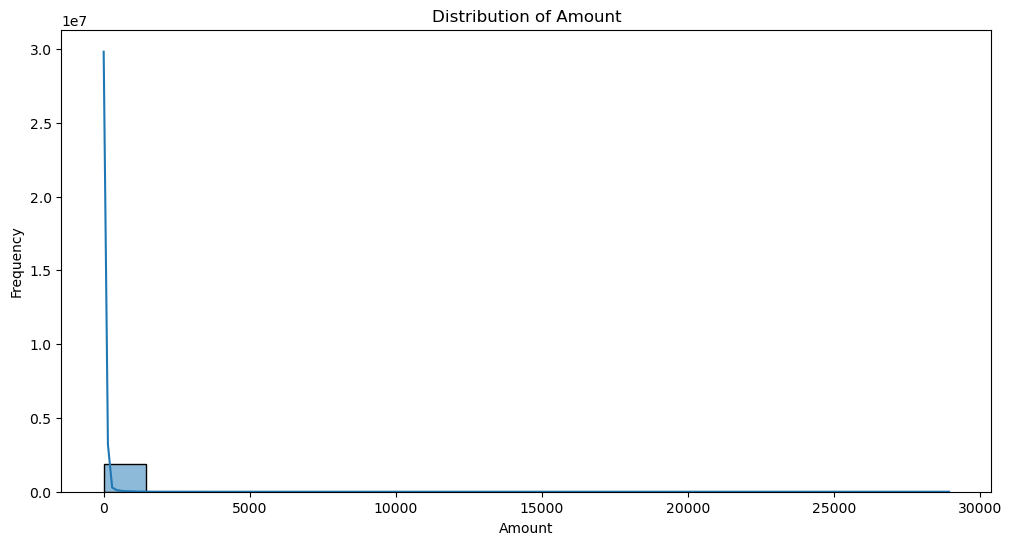

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['amt'], bins=20, kde=True)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')
plt.show()

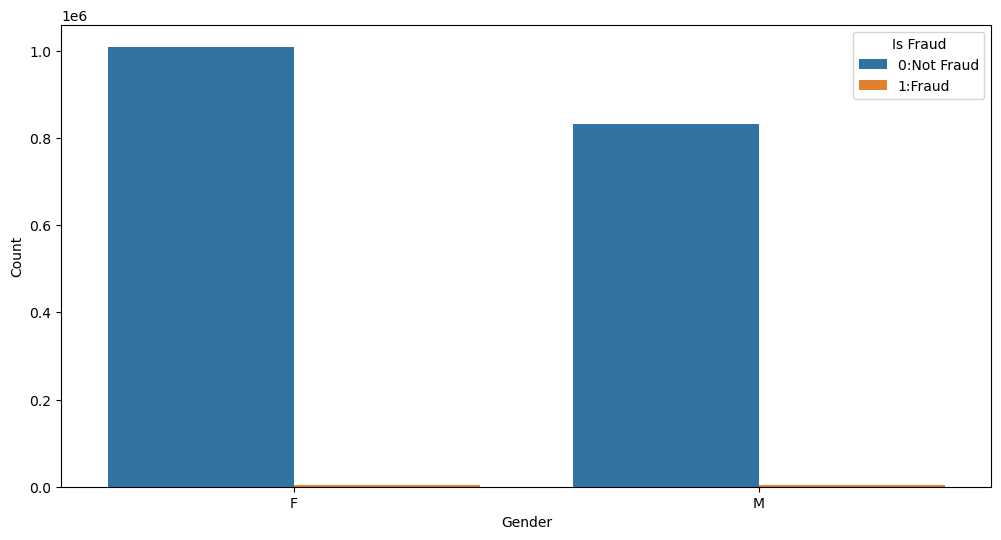

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='is_fraud', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['0:Not Fraud', '1:Fraud'])
plt.show()

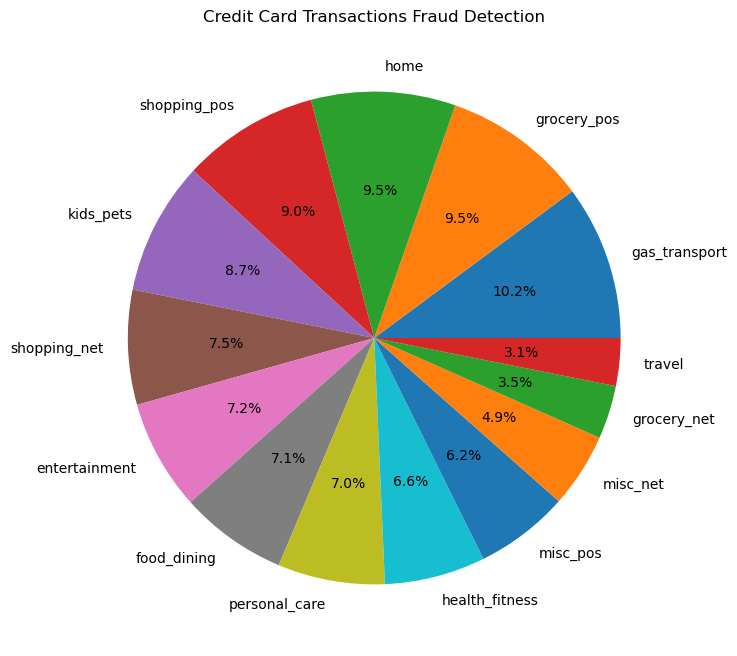

In [18]:
plt.figure(figsize = (10, 8))
plt.title('Credit Card Transactions Fraud Detection')
plt.pie(df['category'].value_counts(), labels = ["gas_transport", "grocery_pos", "home", "shopping_pos", "kids_pets", "shopping_net", "entertainment", "food_dining", "personal_care", "health_fitness", "misc_pos", "misc_net", "grocery_net", "travel"], autopct = '%1.1f%%')
plt.show()

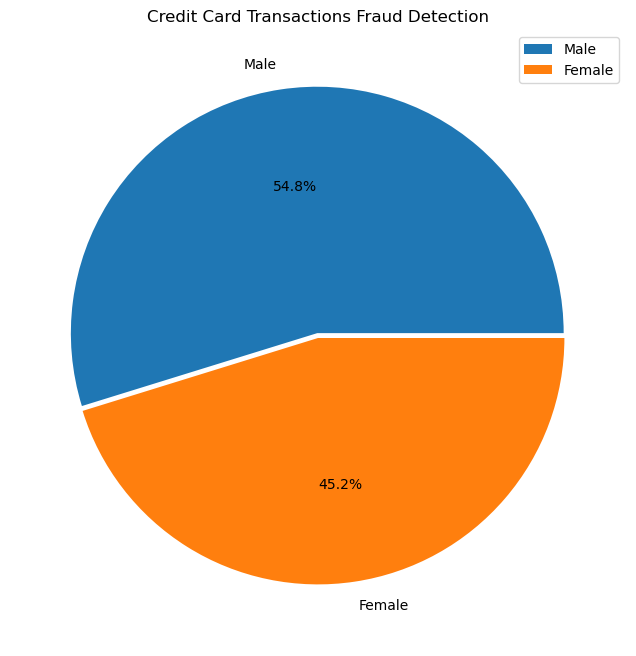

In [19]:
plt.figure(figsize = (13, 8))
plt.title('Credit Card Transactions Fraud Detection')
plt.pie(df['gender'].value_counts(), labels = ['Male', 'Female'], explode = (0.02, 0.0), autopct = '%1.1f%%')
plt.legend(loc = 'best')
plt.show()

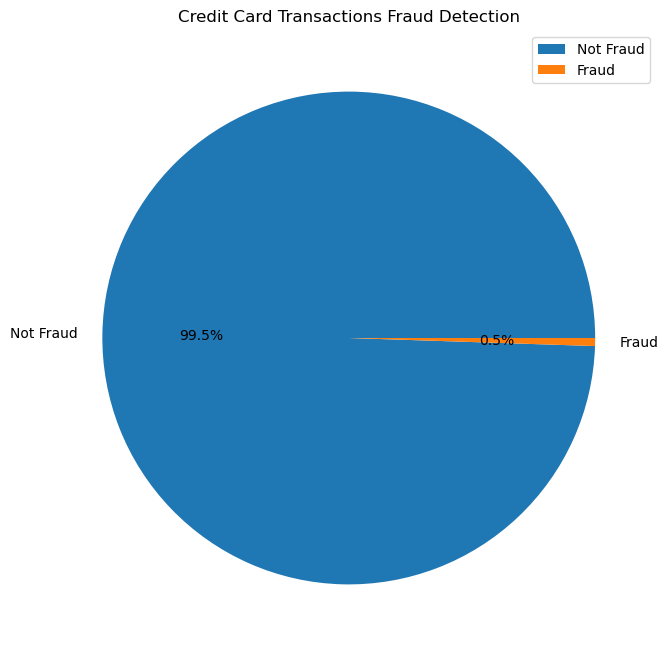

In [20]:
plt.figure(figsize = (12, 8))
plt.title('Credit Card Transactions Fraud Detection')
plt.pie(df['is_fraud'].value_counts(), labels = ['Not Fraud', 'Fraud'],  autopct = '%1.1f%%')
plt.legend(loc = 'best')
plt.show()

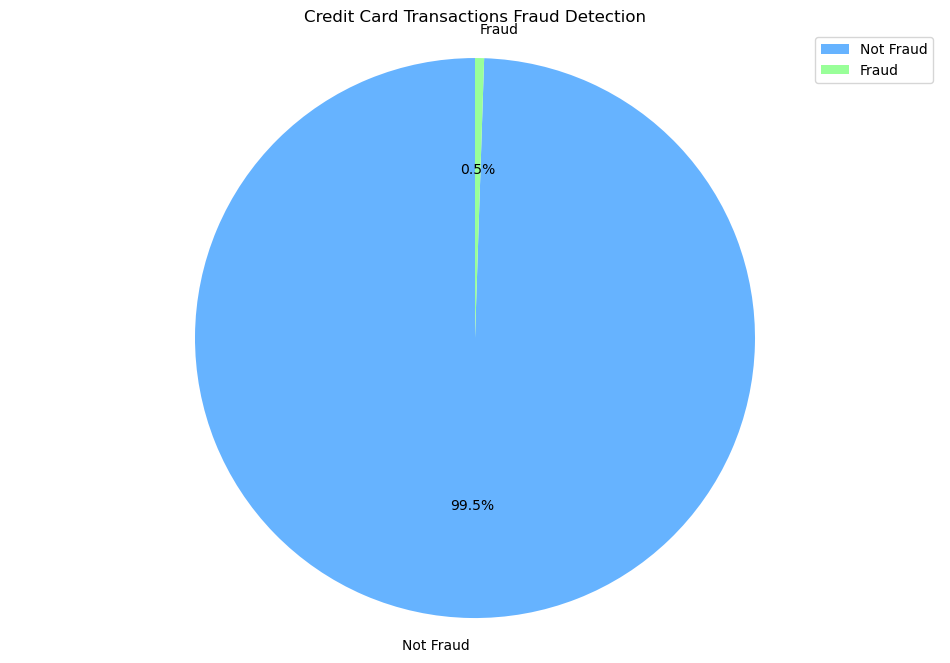

In [21]:
plt.figure(figsize=(12, 8))
plt.title('Credit Card Transactions Fraud Detection')

# Assuming df['is_fraud'] contains binary values (0 or 1)
fraud_counts = df['is_fraud'].value_counts()
labels = ['Not Fraud', 'Fraud']

plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.axis('equal')  
plt.legend(loc='best')
plt.show()

In [22]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [23]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

In [24]:
df = df.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
df = pd.get_dummies(df, columns=['category'], drop_first=True)


df['gender'] = df['gender'].map({'M': 0, 'F': 1})

In [ ]:
corr = df.corr()
sns.heatmap(df,cmap='coolwarm',annot=True)
plt.show()

### Feature selection

In [29]:
# Assume 'is_fraud' is your target variable, and other columns are features
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the features (important for Logistic Regression)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Classifier

In [33]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [34]:
logistic_predictions = logistic_model.predict(X_test_scaled)

Logistic Regression Accuracy Score: 99.43
Confusion Matrix:
[[368381    145]
 [  1953      0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



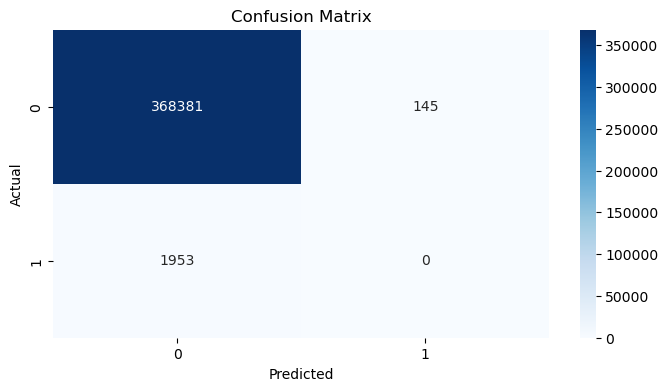

In [77]:
# Calculate the Accuracy score and Classification Report
accuracy = accuracy_score(y_test, logistic_predictions)
report = classification_report(y_test, logistic_predictions)
conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Print the Accuracy score, Confusion Matrix, Classification Report
print(f"Logistic Regression Accuracy Score: {accuracy*100:.2f}")
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')

# Data Visualization
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
 #Check the test score and train score to the Logistic Regression algorithm
print(f'The Test_accuracy: {logistic_model.score(X_test_scaled, y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {logistic_model.score(X_train_scaled, y_train)*100:.2f}')

The Test_accuracy: 99.43
The Train_accuracy: 99.44


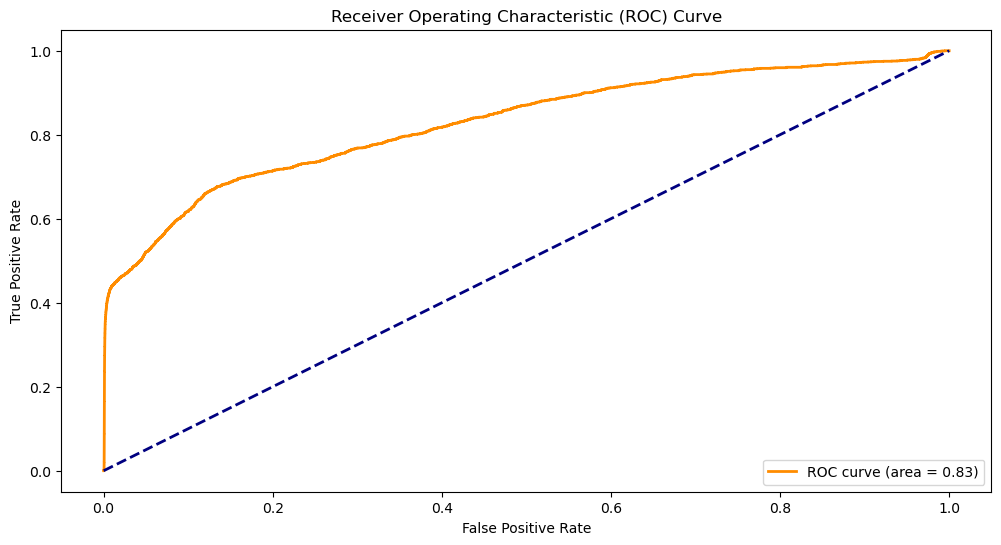

AUC: 82.86


In [90]:
# Get predicted probabilities for the positive class
y_probs = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc_lr = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc_lr*100:.2f}')

# Decision Tree Classifier

In [38]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [39]:
dt_predictions_test = dt_model.predict(X_test_scaled)

In [40]:
# dt_predictions_train = dt_model.predict(X_train_scaled)
# dt_predictions_test = dt_model.predict(X_test_scaled)

Decision Tree Accuracy Score: 99.71
Confusion Matrix:
[[367922    604]
 [   474   1479]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.71      0.76      0.73      1953

    accuracy                           1.00    370479
   macro avg       0.85      0.88      0.87    370479
weighted avg       1.00      1.00      1.00    370479



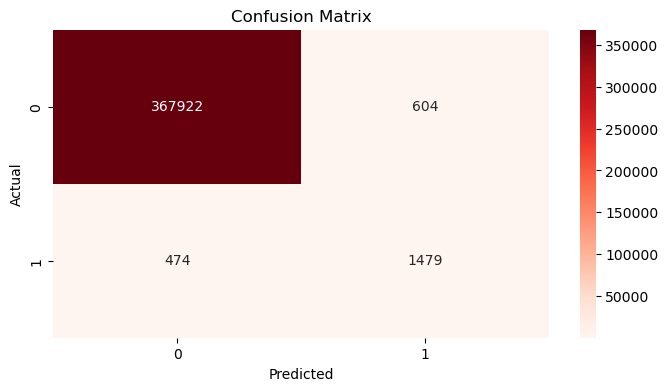

In [83]:
# Calculate the Accuracy score and Classification Report
accuracy = accuracy_score(y_test, dt_predictions_test)
report = classification_report(y_test, dt_predictions_test)
conf_matrix = confusion_matrix(y_test, dt_predictions_test)

# Print the Accuracy score, Confusion Matrix, Classification Report
print(f"Decision Tree Accuracy Score: {accuracy*100:.2f}")
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')

# Data Visualization
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [82]:
# Check the test score and train score for the Decision Tree algorithm
print(f'The Test_accuracy: {dt_model.score(X_test_scaled, y_test)*100:.2f}')

# Train score for the data
print(f'The Train_accuracy: {dt_model.score(X_train_scaled, y_train)*100:.2f}')

The Test_accuracy: 99.71
The Train_accuracy: 100.00


## Plot Tree

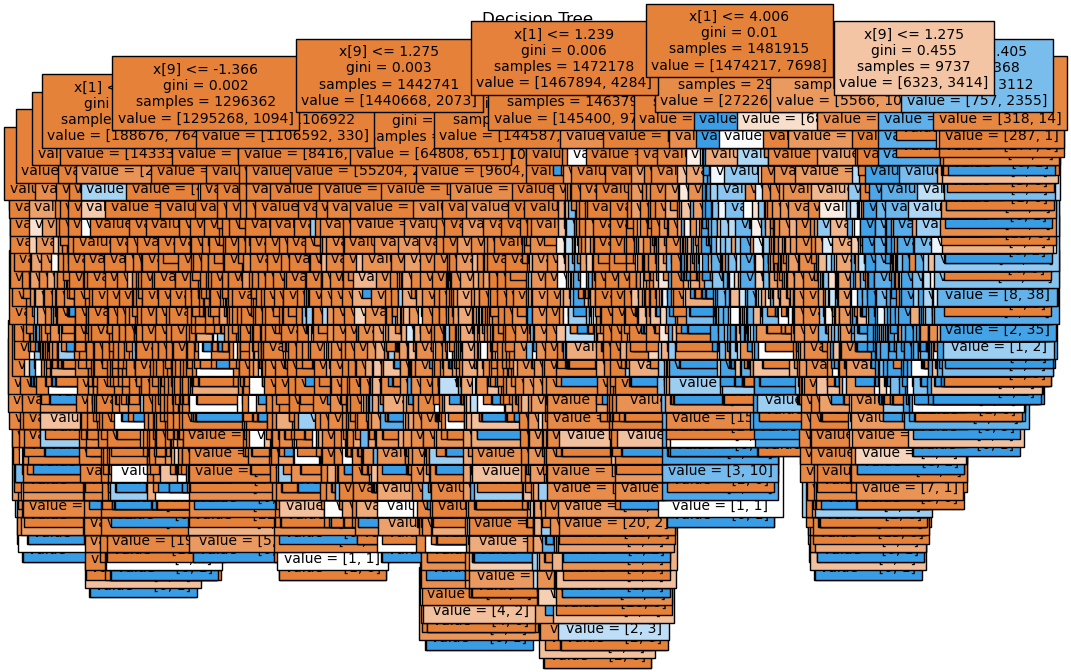

In [110]:
from sklearn.tree import plot_tree
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model,  filled=True, fontsize=10)
plt.title("Decision Tree")
plt.show()

## GridSearchCV Hyperparameter Of Tunning

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [47]:
# Define the parameter grid
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [30],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]  # Corrected parameter name
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Make predictions
y_pred = best_dt_model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9974384513022331


In [43]:
from sklearn.model_selection import cross_val_score

# Assuming 'model' is your machine learning model
scores = cross_val_score(dt_model, X, y, cv=5)  # 5-fold cross-validation
average_score = scores.mean()

In [44]:
print(average_score)

0.7966977854640371


Decision Tree Accuracy Score: 99.74
Confusion Matrix:
[[368073    453]
 [   496   1457]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.76      0.75      0.75      1953

    accuracy                           1.00    370479
   macro avg       0.88      0.87      0.88    370479
weighted avg       1.00      1.00      1.00    370479



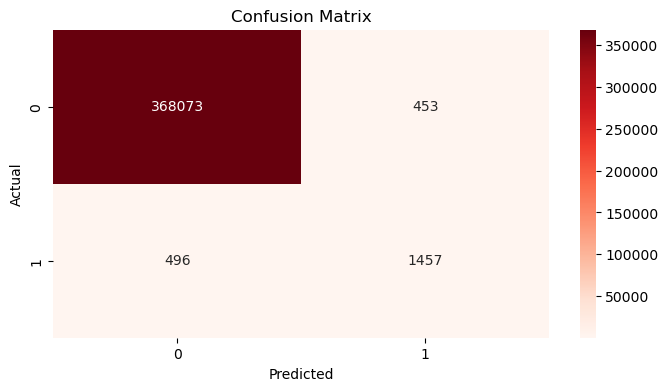

In [74]:
# Calculate the Accuracy score and Classification Report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the Accuracy score, Confusion Matrix, Classification Report
print(f"Decision Tree Accuracy Score: {accuracy * 100:.2f}")
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')

# Data Visualization
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

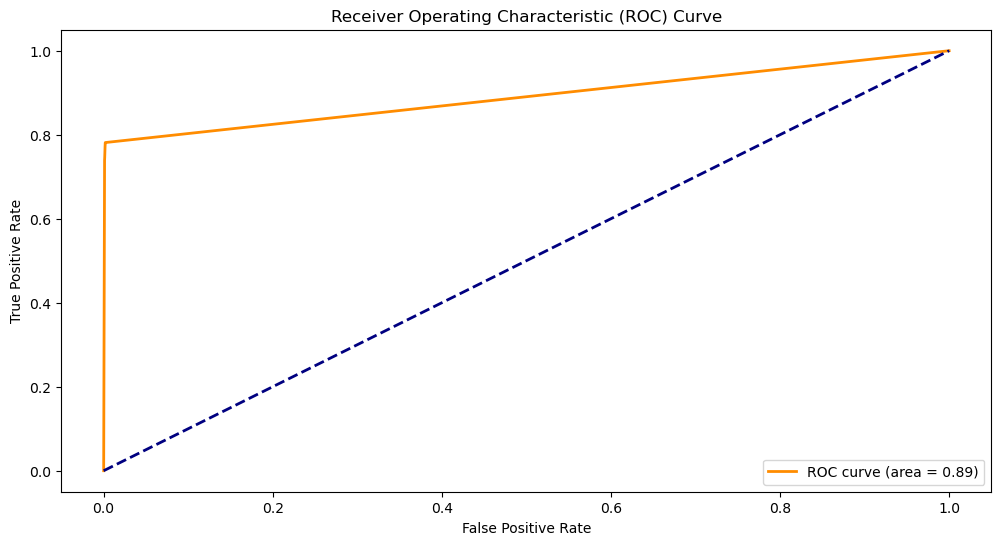

AUC: 89.00


In [96]:
# Get predicted probabilities for the positive class
y_predss = best_dt_model.predict_proba(X_test_scaled)[:,1]
# y_probs = best_dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_predss)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc*100:.2f}')

# Random Forest Classifier

In [52]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [53]:
# rf_predictions_train = rf_model.predict(X_train_scaled)
rf_predictions_test = rf_model.predict(X_test_scaled)

Random Forest Accuracy Score: 99.83
Confusion Matrix:
[[368441     85]
 [   556   1397]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.94      0.72      0.81      1953

    accuracy                           1.00    370479
   macro avg       0.97      0.86      0.91    370479
weighted avg       1.00      1.00      1.00    370479



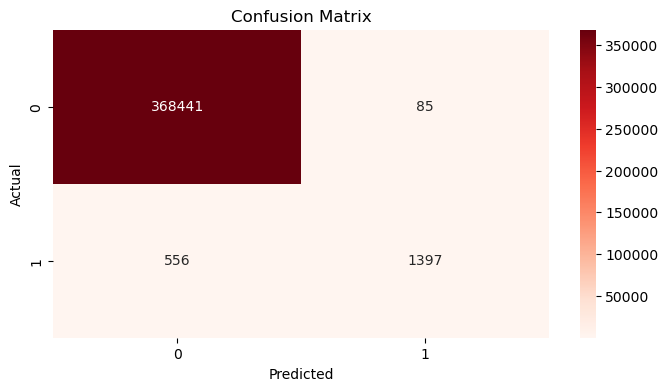

In [78]:
# Calculate the Accuracy score and Classification Report
accuracy = accuracy_score(y_test, rf_predictions_test)
report = classification_report(y_test, rf_predictions_test)
conf_matrix = confusion_matrix(y_test, rf_predictions_test)

# Print the Accuracy score, Confusion Matrix, Classification Report
print(f"Random Forest Accuracy Score: {accuracy*100:.2f}")
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')

# Data Visualization
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Check the test score and train score for the Random Forest algorithm
print(f'The Test_accuracy: {rf_model.score(X_test_scaled, y_test)*100:.2f}')

# Train score for the data
print(f'The Train_accuracy: {rf_model.score(X_train_scaled, y_train)*100:.2f}')

The Test_accuracy: 99.83
The Train_accuracy: 100.00


## Hyperparameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [62]:
parameters={"n_estimators":[50],
            "max_features":['sqrt', 'log2'],
            "bootstrap" : [True]}

# define grid search
grid_search = GridSearchCV(rf_model, param_grid=parameters, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_

y_preds = best_rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_preds)
print(f'Accuracy: {accuracy}')

Accuracy: 0.998250913007215


Random Forest Accuracy Score: 99.83
Confusion Matrix:
[[368439     87]
 [   561   1392]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.94      0.71      0.81      1953

    accuracy                           1.00    370479
   macro avg       0.97      0.86      0.91    370479
weighted avg       1.00      1.00      1.00    370479



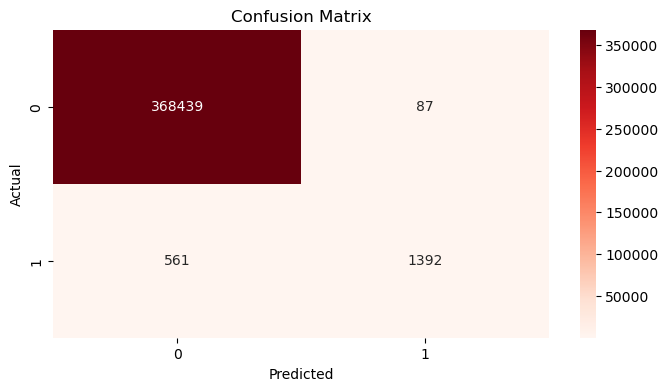

In [79]:
# Calculate the Accuracy score and Classification Report
accuracy = accuracy_score(y_test, y_preds)
report = classification_report(y_test, y_preds)
conf_matrix = confusion_matrix(y_test, y_preds)

# Print the Accuracy score, Confusion Matrix, Classification Report
print(f"Random Forest Accuracy Score: {accuracy*100:.2f}")
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')

# Data Visualization
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

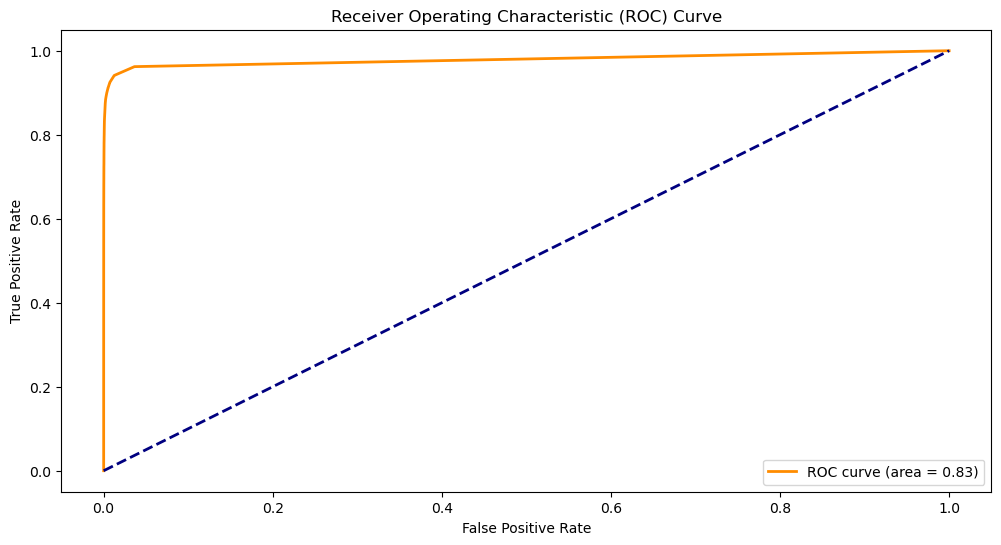

AUC: 97.93


In [92]:
# Get predicted probabilities for the positive class
y_predsss = best_rf_model.predict_proba(X_test_scaled)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_predsss)
roc_auc_rf = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc_rf*100:.2f}')

# Model Performance Comparison

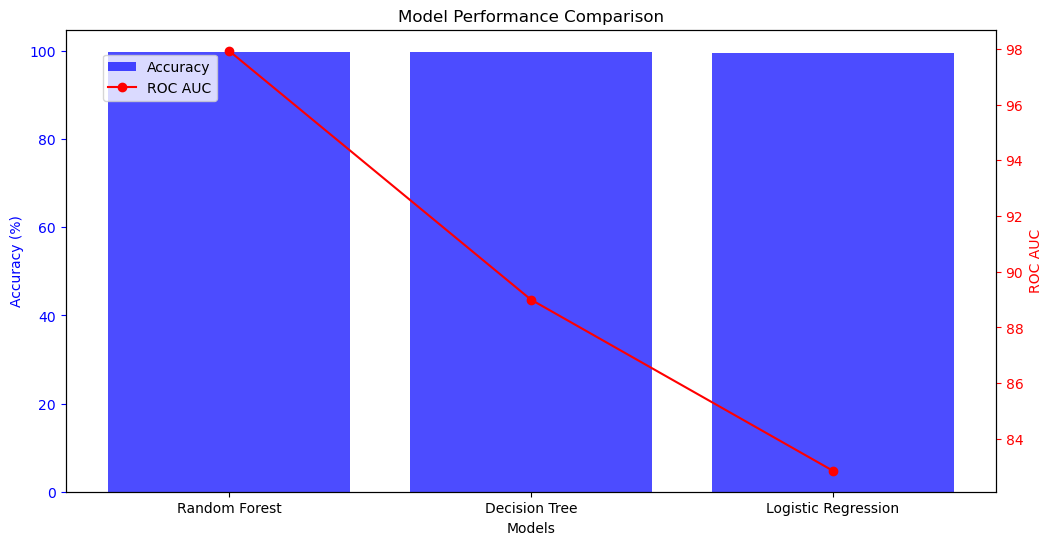

In [102]:
models = ['Random Forest', 'Decision Tree', 'Logistic Regression']

accuracy_scores = [99.83, 99.74, 99.43]

roc_auc_scores = [97.93, 89.00, 82.86]

# Plotting the scores
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(models, accuracy_scores, color='b', alpha=0.7, label='Accuracy')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy (%)', color='b')
ax1.tick_params('y', colors='b')

# Creating a second y-axis for ROC AUC scores
ax2 = ax1.twinx()
ax2.plot(models, roc_auc_scores, color='r', marker='o', label='ROC AUC')
ax2.set_ylabel('ROC AUC', color='r')
ax2.tick_params('y', colors='r')

fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))
plt.title('Model Performance Comparison')
plt.show()

# THANK YOU!